In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
import matplotlib.cm as cm
import math
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

In [5]:
pit = pd.read_excel('https://github.com/siestageek/datasets/blob/master/xlsx/df_pit_2(%EC%88%98%EC%A0%95).xlsx?raw=true')
pit.head(10)

,Unnamed: 0,player_team,player_ERA,player_GP,player_CG,player_SHO,player_W,player_L,player_SV,player_HLD,player_WPCT,player_TBF,player_IP,player_HP,player_HRP,player_BBP,player_HBPP,player_SOP,player_RP,player_ER,mvp
0,75,0.857143,0.541985,0.345455,0.500,0.666667,0.909091,0.9,0.000000,0.0,0.544393,1.000000,1.000000,0.970297,0.571429,1.000000,0.705882,1.000000,1.000000,1.000000,0
1,76,0.857143,0.412214,0.363636,0.750,0.333333,0.909091,1.0,0.111111,0.0,0.500000,0.879406,0.888889,0.990099,1.000000,0.811881,0.176471,0.637681,0.867647,0.797101,0
2,77,0.571429,0.706107,0.254545,1.000,1.000000,0.727273,0.6,0.000000,0.0,0.605140,0.580705,0.587179,0.782178,0.666667,0.306931,0.470588,0.210145,0.823529,0.826087,0
3,78,0.428571,0.522901,0.400000,0.125,0.000000,0.545455,0.4,0.111111,0.0,0.630841,0.625232,0.587179,0.801980,0.666667,0.524752,0.411765,0.449275,0.838235,0.681159,0
4,79,0.142857,0.545802,0.272727,0.125,0.333333,0.909091,0.2,0.055556,0.0,0.967290,0.582560,0.581197,0.683168,0.904762,0.287129,0.882353,0.427536,0.676471,0.695652,0
5,80,1.000000,0.664122,0.254545,0.000,0.000000,1.000000,0.2,0.000000,0.0,1.000000,0.525046,0.484615,0.831683,0.571429,0.356436,0.117647,0.239130,0.691176,0.710145,0
6,81,0.142857,0.496183,0.363636,0.000,0.000000,0.818182,0.4,0.000000,0.0,0.778037,0.506494,0.452991,0.683168,0.238095,0.554455,0.352941,0.137681,0.588235,0.565217,0
7,82,0.714286,0.832061,0.272727,0.000,0.000000,0.545455,0.5,0.000000,0.0,0.560748,0.487941,0.410256,0.653465,0.476190,0.544554,0.529412,0.021739,0.750000,0.768116,0
8,83,0.714286,0.820611,0.236364,0.000,0.000000,0.363636,0.7,0.000000,0.0,0.315421,0.441558,0.384615,0.603960,0.333333,0.465347,0.176471,0.195652,0.661765,0.739130,0
9,84,0.285714,0.736641,0.163636,0.625,0.333333,0.909091,0.5,0.000000,0.0,0.754673,0.378479,0.367521,1.000000,0.190476,0.099010,0.058824,0.000000,0.617647,0.666667,0


In [139]:
data = pit.loc[:, ['player_W','player_WPCT']].to_numpy()    # 'player_ERA'
target = pit.loc[:, 'mvp']

print("종속변수 값 비율\n", target.value_counts())

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.3,
            random_state=2010061100, stratify=target)
    

종속변수 값 비율
 0    466
1      9
Name: mvp, dtype: int64


훈련 정확도 0.9819277108433735
예측정확도 0.9790209790209791
[[140   0]
 [  3   0]]
정밀도 1.0
재현율 0.9790209790209791


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


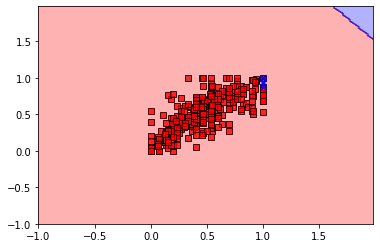

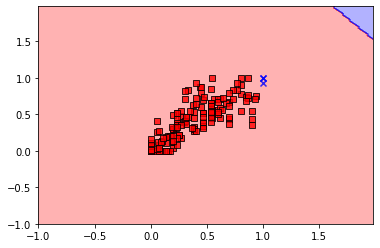

In [140]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

print('훈련 정확도', lr.score(x_train, y_train))

pred = lr.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, lr)
plt.show()

plot_decision_regions(x_test, y_test, lr)
plt.show()

In [141]:
lr = LogisticRegression()
lr.fit(data, target)

print('훈련 정확도', lr.score(data, target))

print(confusion_matrix(target, lr.predict(data)))


훈련 정확도 0.9810526315789474
[[466   0]
 [  9   0]]


훈련 정확도 0.9909638554216867
예측정확도 0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


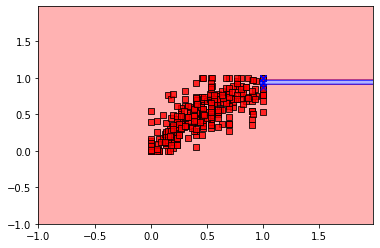

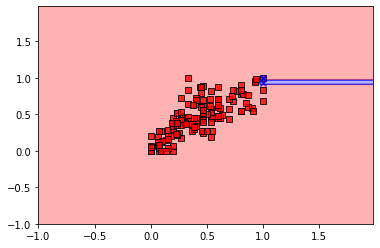

In [71]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('훈련 정확도', dt.score(x_train, y_train))

pred = dt.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, dt)
plt.show()

plot_decision_regions(x_test, y_test, dt)
plt.show()

In [62]:
dt = DecisionTreeClassifier()
dt.fit(data, target)

print('훈련 정확도', dt.score(data, target))

print(confusion_matrix(target, lr.predict(data)))

훈련 정확도 1.0
[[466   0]
 [  9   0]]


훈련 정확도 0.9819277108433735
예측정확도 0.9790209790209791
[[140   0]
 [  3   0]]
정밀도 1.0
재현율 0.9790209790209791


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


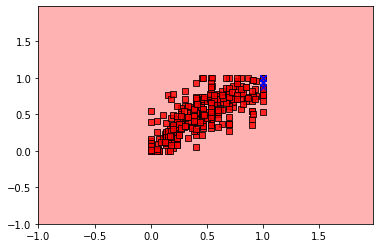

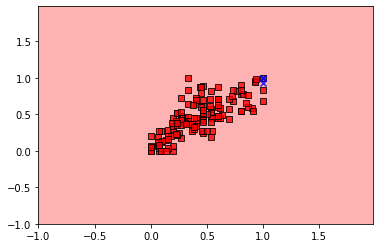

In [72]:
# 나이브 베이즈

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB()
bayes.fit(x_train, y_train)
print('훈련 정확도', bayes.score(x_train, y_train))

pred = bayes.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, bayes)
plt.show()

plot_decision_regions(x_test, y_test, bayes)
plt.show()

In [23]:
bayes = BernoulliNB()
bayes.fit(data, target)
print('훈련 정확도', bayes.score(data, target))

# 모델 평가
print(confusion_matrix(target, bayes.predict(data)))

훈련 정확도 0.9810526315789474
[[466   0]
 [  9   0]]


훈련정확도 0.9849397590361446
예측정확도 0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


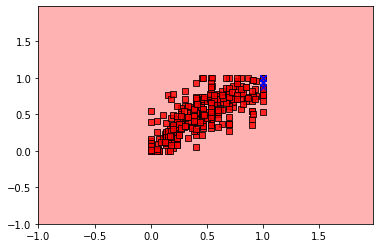

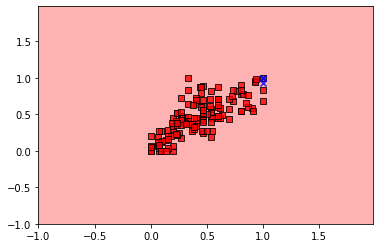

In [73]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# knn 분석 : k=4
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print('훈련정확도', knn.score(x_train, y_train))
print('예측정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, knn)
plt.show()

plot_decision_regions(x_test, y_test, knn)
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(data, target)

print('훈련정확도', knn.score(data, target))

print(confusion_matrix(target, knn.predict(data)))

훈련정확도 0.9936842105263158
[[464   2]
 [  1   8]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

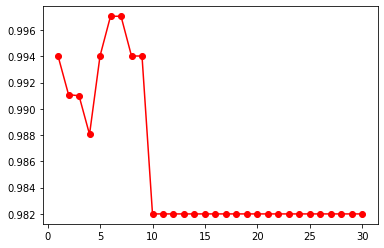

In [44]:
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train,
                            cv=10, scoring='accuracy')
    scores.append(score.mean())

# 교차검증 시각화
x = range(1,31)
plt.plot(x, scores, 'ro-')
plt.show()    

훈련 정확도 0.9909638554216867
예측 정확도 0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


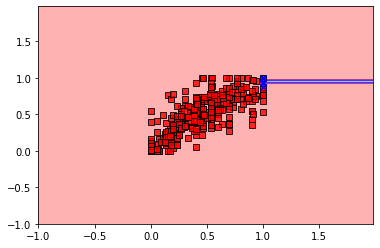

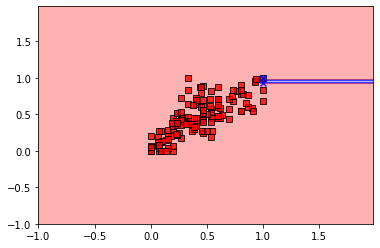

In [81]:
# 부스팅 계열

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')

adaclf.fit(x_train, y_train)
print('훈련 정확도', adaclf.score(x_train, y_train))

pred = adaclf.predict(x_test)
print('예측 정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, adaclf)
plt.show()

plot_decision_regions(x_test, y_test, adaclf)
plt.show()

In [92]:
adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')
adaclf.fit(data, target)

print('훈련정확도', adaclf.score(data, target))

print(confusion_matrix(target, adaclf.predict(data)))

훈련정확도 0.9894736842105263
[[466   0]
 [  5   4]]


0.9909638554216867
0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


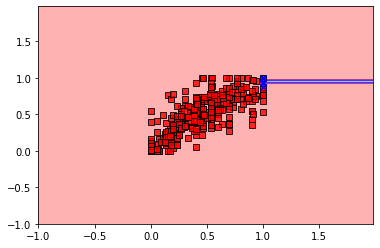

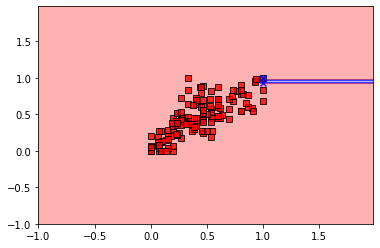

In [84]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)

# 훈련 및 평가, 결정경계 시각화
gbclf.fit(x_train, y_train)
print(gbclf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = gbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, gbclf)
plt.show()

plot_decision_regions(x_test, y_test, gbclf)
plt.show()

In [93]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)
gbclf.fit(data, target)

print('훈련정확도', gbclf.score(data, target))

print(confusion_matrix(target, gbclf.predict(data)))

훈련정확도 0.9894736842105263
[[466   0]
 [  5   4]]


0.9909638554216867
0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


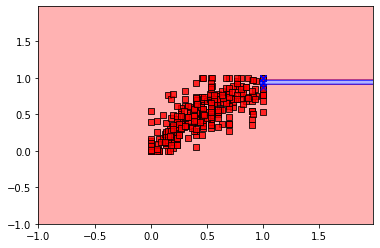

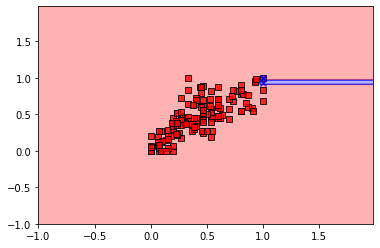

In [91]:
rfcf = RandomForestClassifier()

# 훈련 및 평가, 결정경계 시각화
rfcf.fit(x_train, y_train)
print(rfcf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = rfcf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, rfcf)
plt.show()

plot_decision_regions(x_test, y_test, rfcf)
plt.show()


In [94]:
rfcf = RandomForestClassifier()
rfcf.fit(data, target)

print('훈련정확도', rfcf.score(data, target))

print(confusion_matrix(target, rfcf.predict(data)))

훈련정확도 0.9894736842105263
[[466   0]
 [  5   4]]


0.9879518072289156
0.986013986013986
[[140   0]
 [  2   1]]
정밀도 0.9953379953379954
재현율 0.986013986013986


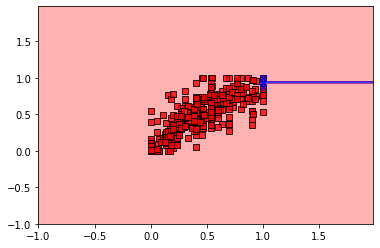

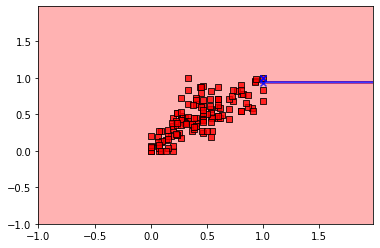

In [90]:
from xgboost import XGBClassifier

xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(x_train, y_train)
print(xgbclf.score(x_train, y_train))

pred = xgbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, xgbclf)
plt.show()

plot_decision_regions(x_test, y_test, xgbclf)
plt.show()

In [95]:
xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(data, target)

print('훈련정확도', xgbclf.score(data, target))

print(confusion_matrix(target, xgbclf.predict(data)))

훈련정확도 0.9873684210526316
[[466   0]
 [  6   3]]


In [103]:
# SVM 분석

from sklearn.svm import SVC

svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(x_train, y_train)
pred = svcl.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svc.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.9819277108433735
예측 정확도 0.9790209790209791


array([[140,   0],
       [  3,   0]])

정밀도 1.0
재현율 0.9790209790209791


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


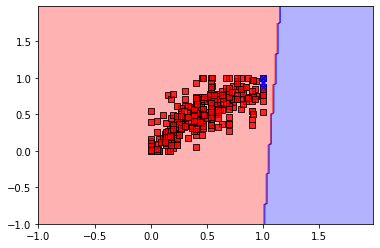

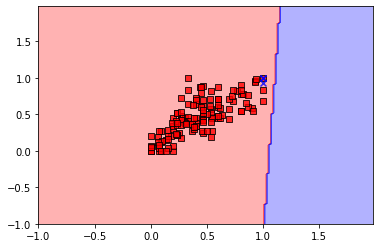

In [104]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcl)
plt.show()

plot_decision_regions(x_test, y_test, svcl)
plt.show()

In [105]:
svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(data, target)

print('훈련정확도', svcl.score(data, target))

print(confusion_matrix(target, svcl.predict(data)))

훈련정확도 0.9810526315789474
[[466   0]
 [  9   0]]


In [126]:
svcrb = SVC(kernel='rbf', C=1E5, random_state=0)
svcrb.fit(x_train, y_train)
pred = svcrb.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svcrb.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)

훈련 정확도 0.9879518072289156
예측 정확도 0.986013986013986


array([[140,   0],
       [  2,   1]])

정밀도 0.9953379953379954
재현율 0.986013986013986


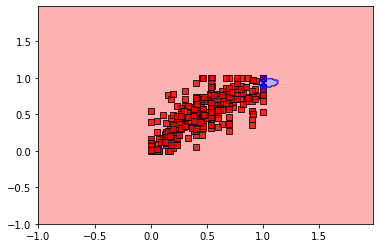

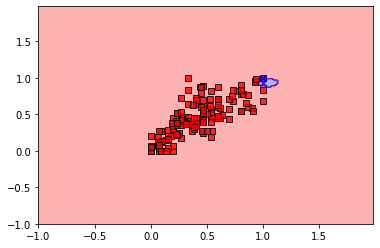

In [127]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcrb)
plt.show()

plot_decision_regions(x_test, y_test, svcrb)
plt.show()

In [128]:
svcrb = SVC(kernel='rbf', C=1E5, random_state=0)
svcrb.fit(data, target)

print('훈련정확도', svcrb.score(data, target))

print(confusion_matrix(target, svcrb.predict(data)))

훈련정확도 0.9873684210526316
[[466   0]
 [  6   3]]


In [194]:
# 신경망

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[15, 50])
# mlp = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=[50])
mlp.fit(x_train, y_train)

pred = mlp.predict(x_test)

# 분석결과 평가
print('훈련 정확도', mlp.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.9879518072289156
예측 정확도 0.986013986013986


array([[140,   0],
       [  2,   1]])

정밀도 0.9953379953379954
재현율 0.986013986013986


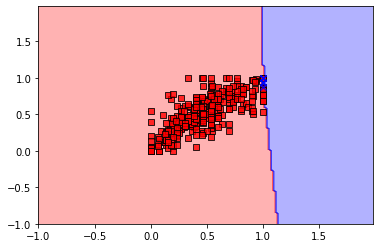

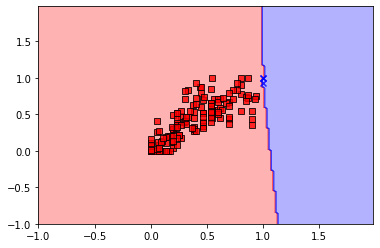

In [190]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, mlp)
plt.show()

plot_decision_regions(x_test, y_test, mlp)
plt.show()

훈련정확도 0.9831578947368421
[[459   7]
 [  1   8]]


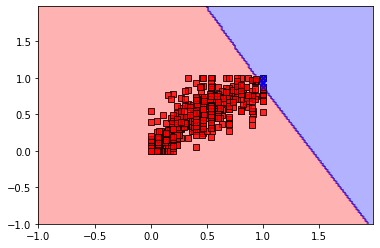

In [196]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5,10])
mlp.fit(data, target)

print('훈련정확도', mlp.score(data, target))

print(confusion_matrix(target, mlp.predict(data)))

plot_decision_regions(data, target, mlp)
plt.show()